Project root: /workspaces/Gini-index-prediction
Clean data loaded: (1528, 13)

=== Figures du modèle XGBoost ===


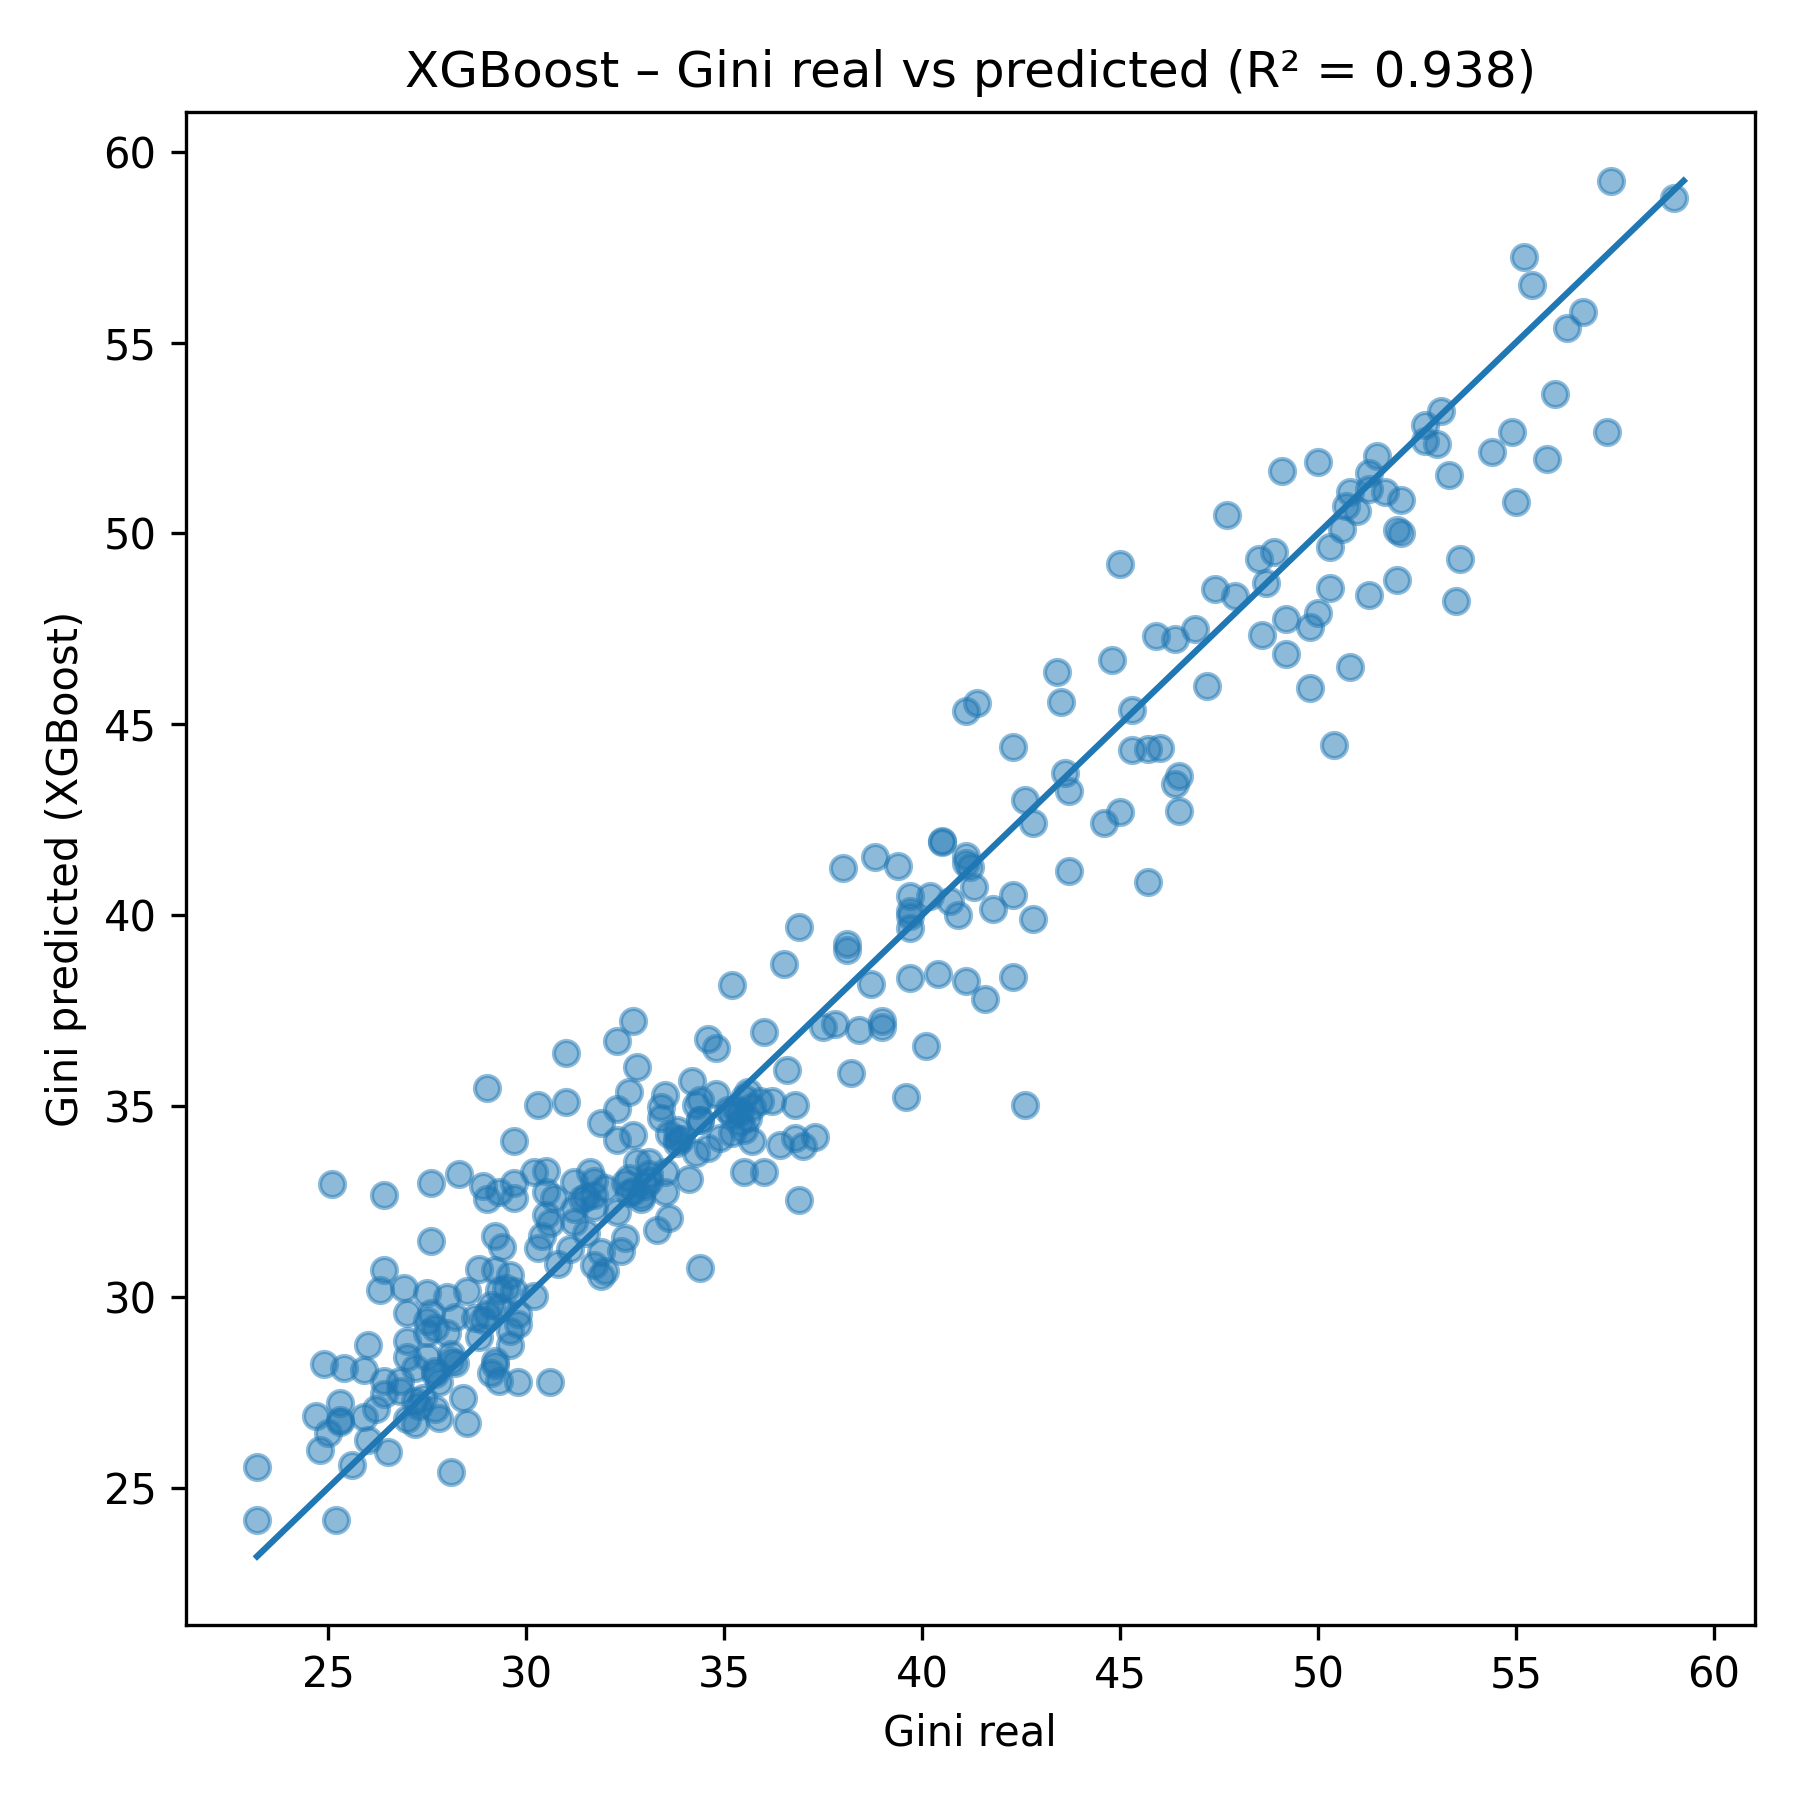

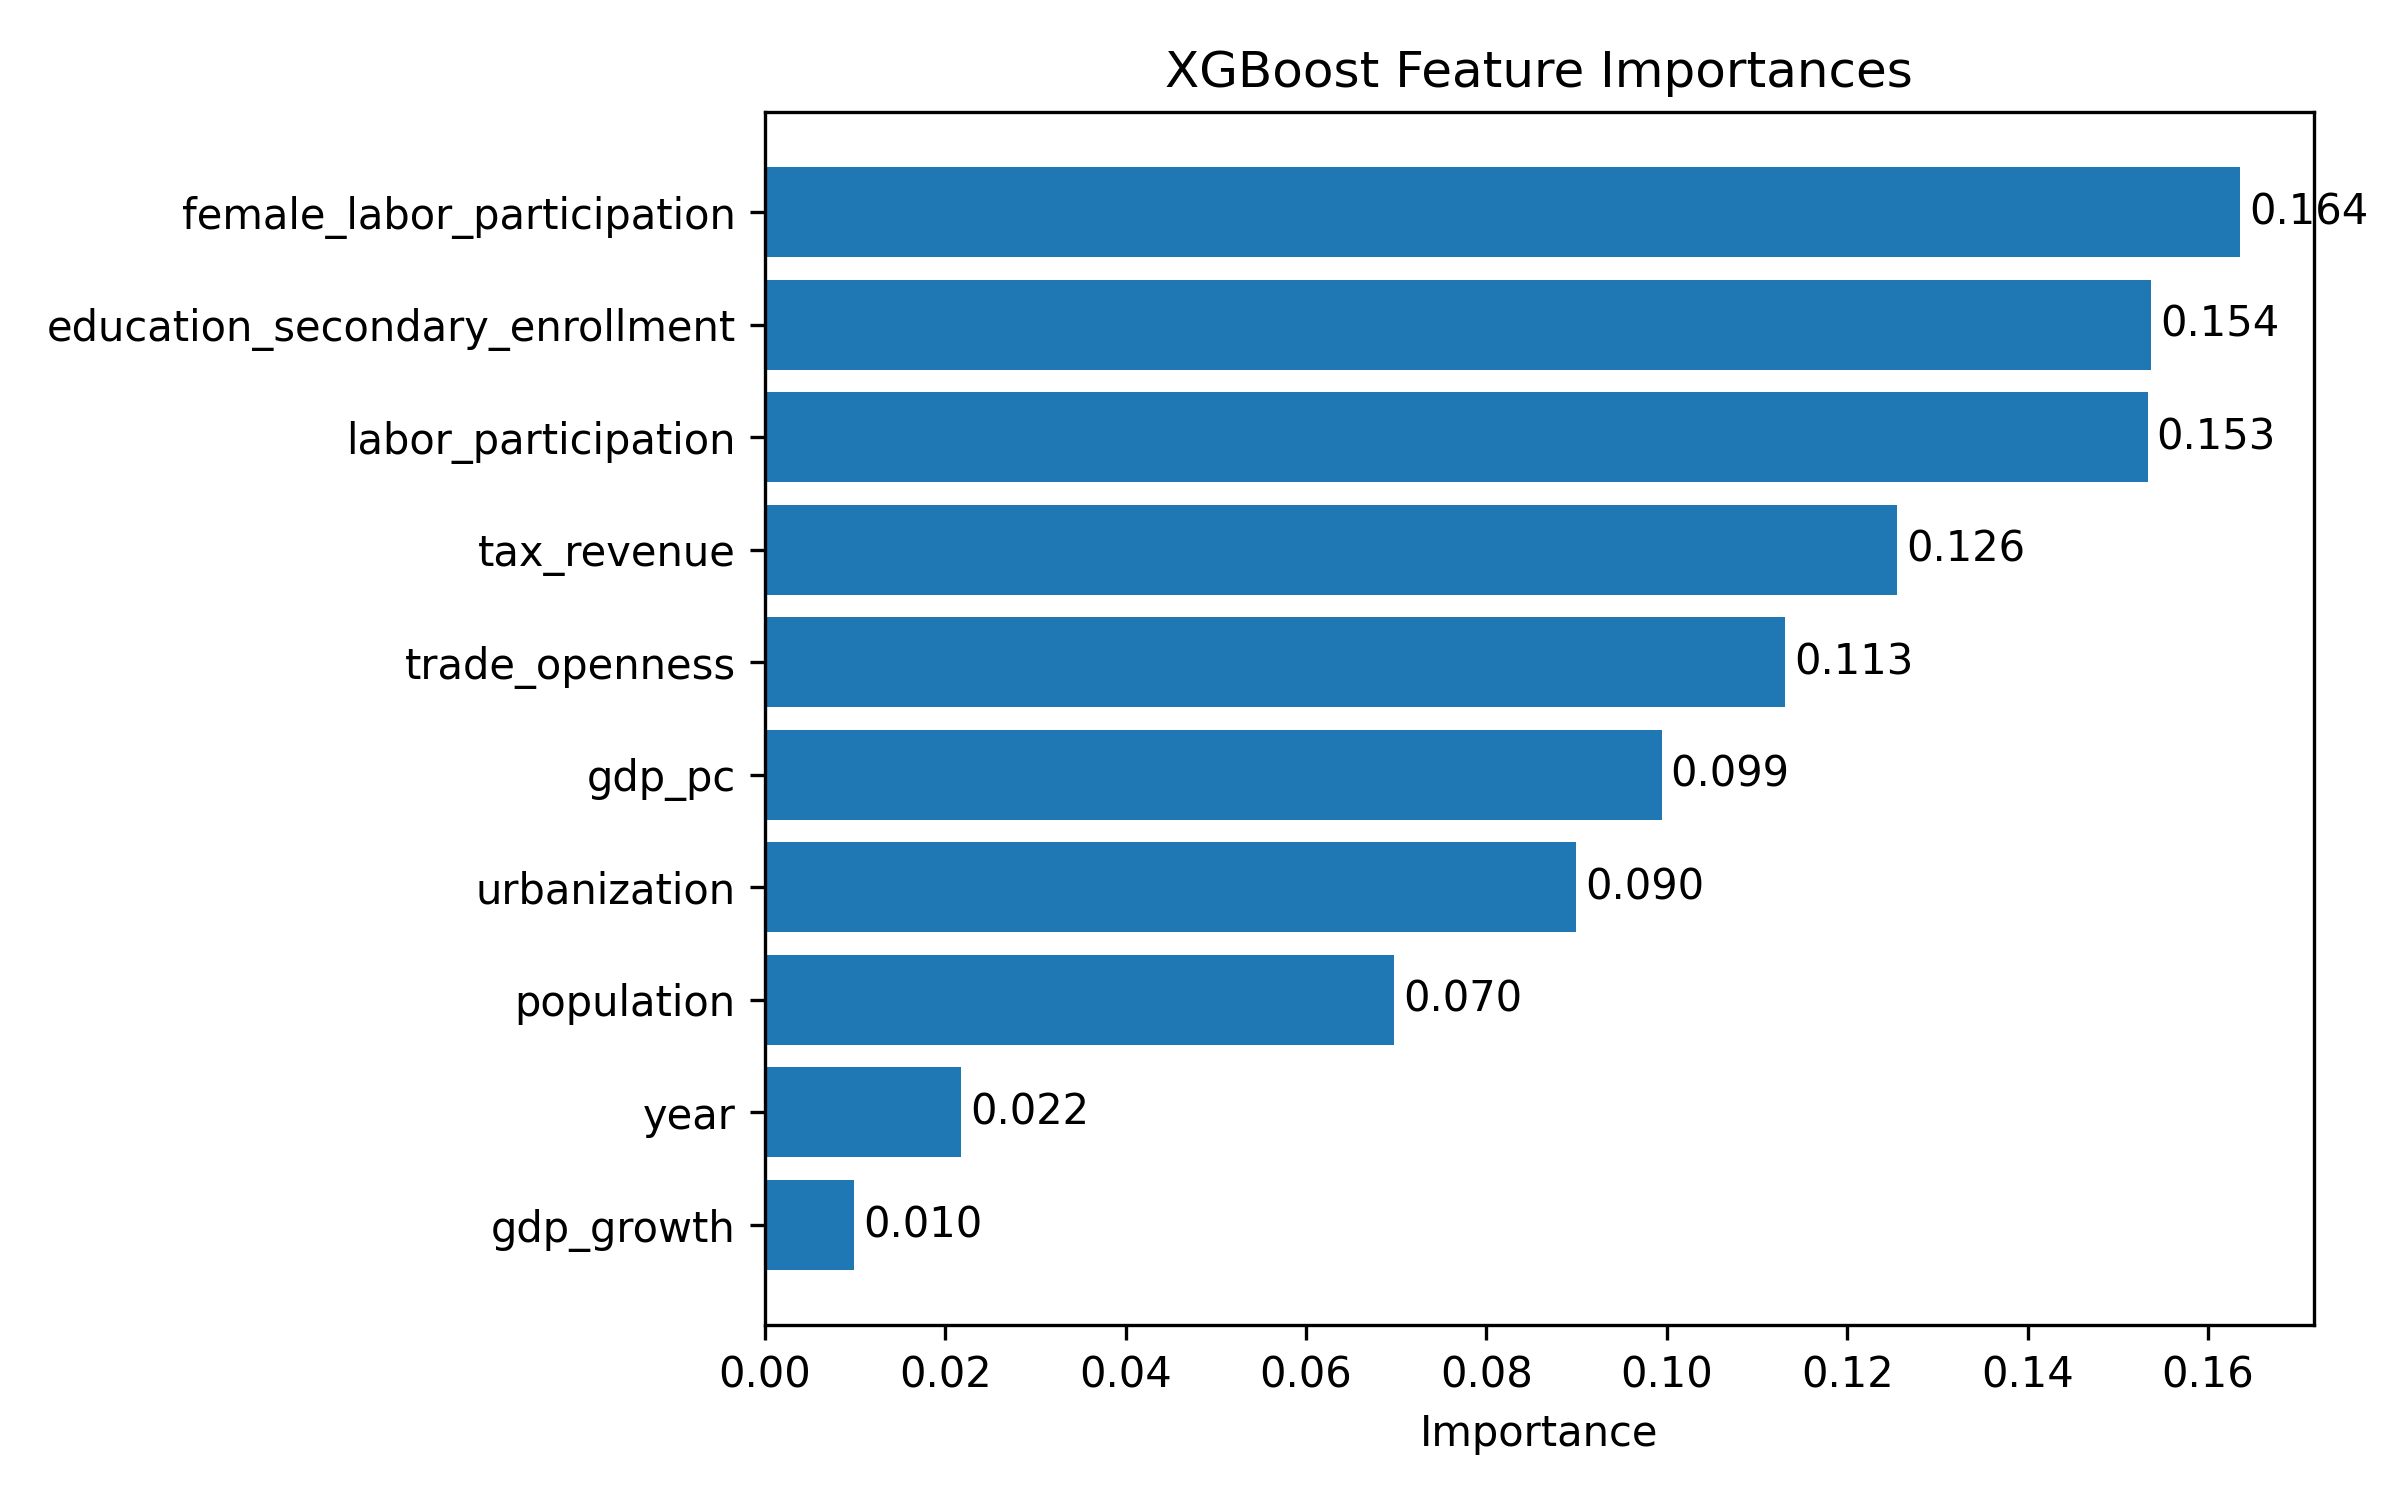

/tmp/ipykernel_36859/1242474191.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_focus, x="country", y="gini", palette="Set2")



Boxplot saved in: /workspaces/Gini-index-prediction/results/boxplot_gini_us_fr_br.png


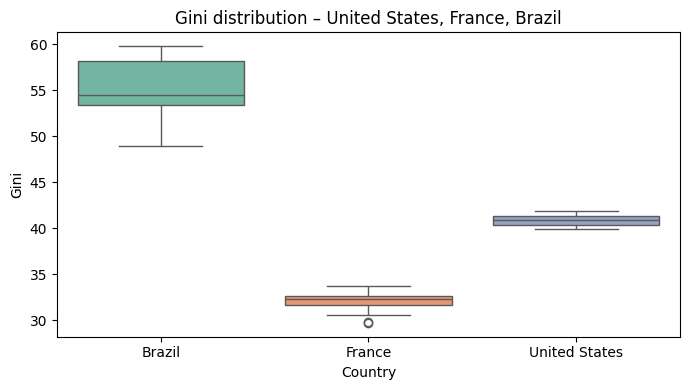

/tmp/ipykernel_36859/1242474191.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="OrRd_r")



Top 10 figure saved in: /workspaces/Gini-index-prediction/results/top10_inequality.png


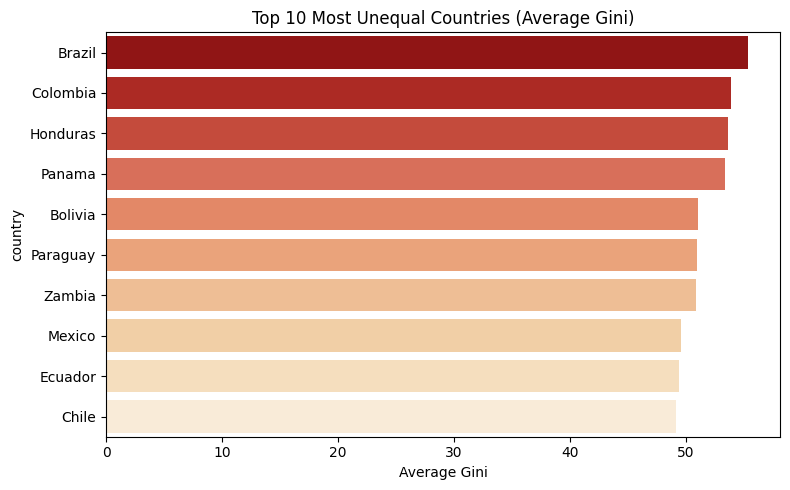

Heatmap sauvegardée dans : /workspaces/Gini-index-prediction/results/heatmap_correlations.png


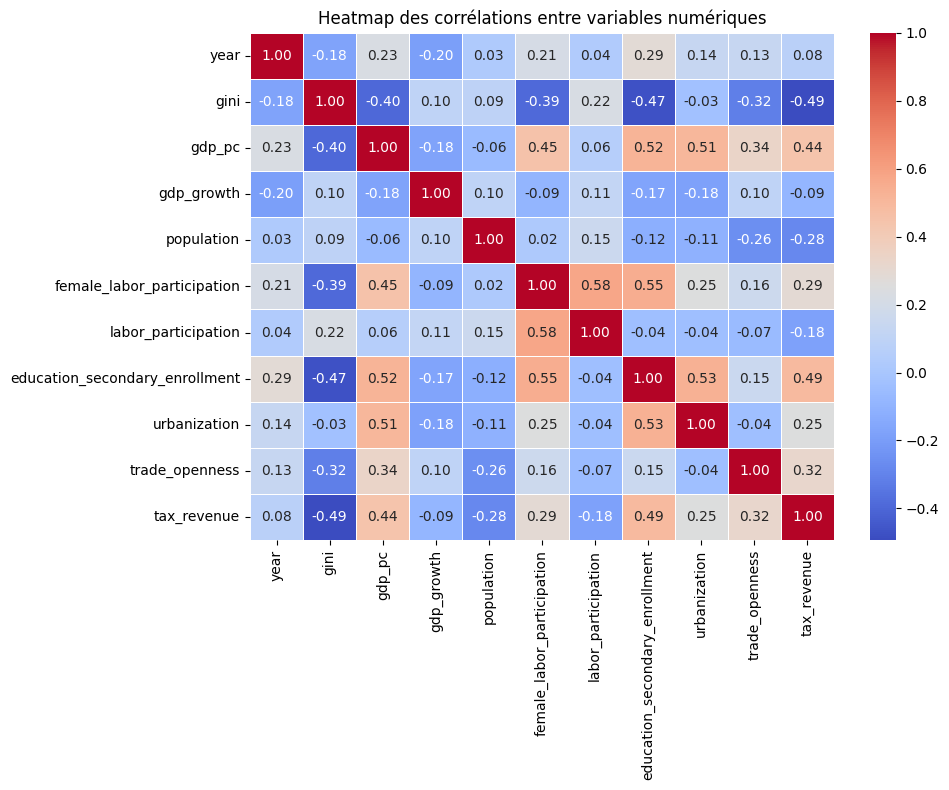

In [1]:

import sys
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display


# ============================================================
# 1) Définir les chemins
# ============================================================
project_root = Path().resolve().parents[0]
data_path = project_root / "data"
results_dir = project_root / "results"

results_dir.mkdir(exist_ok=True)

print("Project root:", project_root)


# ============================================================
# 2) Charger les données nettoyées
# ============================================================
clean_file = data_path / "inequality_clean.xlsx"

df = pd.read_excel(clean_file)
print("Clean data loaded:", df.shape)
df.head()


# ============================================================
# 3) Afficher les figures XGBoost générées dans PyCharm
# ============================================================
print("\n=== Figures du modèle XGBoost ===")

display(Image(str(results_dir / "xgb_true_vs_pred.png")))
display(Image(str(results_dir / "xgb_feature_importances_plot.png")))


# ============================================================
# 4) Boxplot États-Unis / France / Brésil
# ============================================================
focus_countries = ["United States", "France", "Brazil"]
df_focus = df[df["country"].isin(focus_countries)].copy()

plt.figure(figsize=(7, 4))
sns.boxplot(data=df_focus, x="country", y="gini", palette="Set2")
plt.xlabel("Country")
plt.ylabel("Gini")
plt.title("Gini distribution – United States, France, Brazil")

plt.tight_layout()
boxplot_path = results_dir / "boxplot_gini_us_fr_br.png"
plt.savefig(boxplot_path, dpi=300)
print("\nBoxplot saved in:", boxplot_path)

plt.show()


# ============================================================
# 5) Top 10 pays les plus inégalitaires (moyenne du Gini)
# ============================================================
gini_mean = (
    df.groupby("country")["gini"]
    .mean()
    .sort_values(ascending=False)
)

top10 = gini_mean.head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top10.values, y=top10.index, palette="OrRd_r")
plt.xlabel("Average Gini")
plt.title("Top 10 Most Unequal Countries (Average Gini)")

plt.tight_layout()
top10_path = results_dir / "top10_inequality.png"
plt.savefig(top10_path, dpi=300)
print("\nTop 10 figure saved in:", top10_path)

plt.show()

top10

numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(10, 8))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Heatmap des corrélations entre variables numériques")
plt.tight_layout()

output_path = results_dir / "heatmap_correlations.png"
plt.savefig(output_path, dpi=300)
print("Heatmap sauvegardée dans :", output_path)

plt.show()



